In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc,precision_recall_curve
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import joblib
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score


In [2]:
def ameliorate_with_grid_search(model,x_train,y_train,parameters):
    grid_search = GridSearchCV(model,parameters,)
    grid_search.fit(x_train,y_train)
    return grid_search.best_estimator_,grid_search.best_params_
    

In [3]:
df = pd.read_csv("../../DataGeneration/df_features.csv")
y = df['etiquette']
df.drop(columns=['Unnamed: 0','etiquette'],inplace=True)
df

,montant_operation,montant_banque,presence_num_ref,similarite_cos,delai_jours,delai_absolu,dans_fenetre_valide,montant_ratio,ecart_montant,montant_exact_match,...,categorie_fournitures_bureau,categorie_frais_bancaires,categorie_juridique_conformité,categorie_licences_logicielles,categorie_maintenance,categorie_marketing,categorie_outils_rh,categorie_services_cloud,categorie_services_publiques,categorie_équipement
0,448.85,988.89,True,0.315020,5,5,True,0.453893,540.04,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,186.47,685.81,True,0.347944,65,65,True,0.271897,499.34,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,518.18,518.18,True,0.277123,1,1,True,1.000000,0.00,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,534.96,534.96,True,0.431332,0,0,True,1.000000,0.00,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,524.38,524.38,True,0.225302,2,2,True,1.000000,0.00,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26725,5629.49,4539.64,True,0.388435,13,13,True,1.240074,1089.85,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26726,5201.08,712.56,True,0.323836,0,0,True,7.299147,4488.52,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26727,5201.08,4488.52,True,0.339805,18,18,True,1.158752,712.56,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26728,1765.32,929.60,True,0.438161,2,2,True,1.899010,835.72,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.2,random_state=42)

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation

{'kernel': 'rbf', 'max_iter': 700}
0.5611672278338945
              precision    recall  f1-score   support

           0       0.70      0.08      0.14      2455
           1       0.55      0.97      0.71      2891

    accuracy                           0.56      5346
   macro avg       0.63      0.52      0.42      5346
weighted avg       0.62      0.56      0.45      5346

[[ 193 2262]
 [  84 2807]]


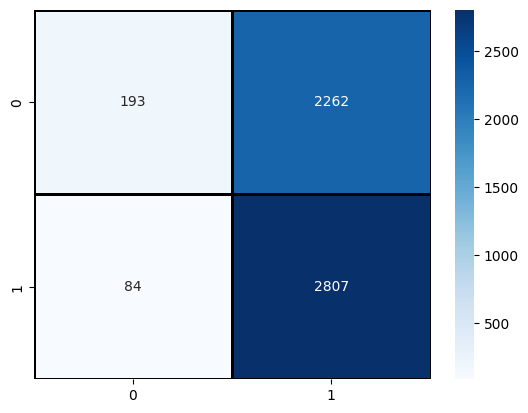

In [23]:
params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'max_iter':[100,200,500,700,1000]}
svm_model = SVC(probability=True)
svm_model,best_params = ameliorate_with_grid_search(svm_model,X_train,y_train,params)
# svm_model.fit(X_train,y_train)
y_predict = svm_model.predict(X_test)
print(best_params)
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict), annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')
plt.show()

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

Best params: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.9674523007856342

Confusion Matrix:
 [[2302  153]
 [  21 2870]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      2455
           1       0.95      0.99      0.97      2891

    accuracy                           0.97      5346
   macro avg       0.97      0.97      0.97      5346
weighted avg       0.97      0.97      0.97      5346



C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

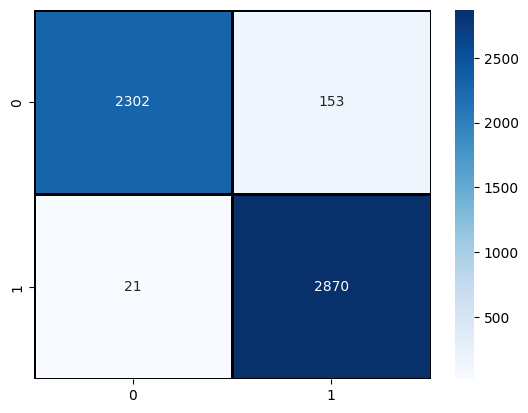

In [6]:
logreg_model = LogisticRegression(max_iter=1000)

# Grille d'hyperparamètres à tester
params = {
    'C': [0.01, 0.1, 1, 10, 100],  # régularisation inverse
    'penalty': ['l2'],             # on choisit L2 (tu peux tester 'l1' avec solver adapté)
    'solver': ['lbfgs']            # solver compatible avec 'l2'
}

# Recherche des meilleurs paramètres
best_model, best_params = ameliorate_with_grid_search(logreg_model, X_train, y_train, params)

print("Best params:", best_params)

# Évaluation sur test
y_pred = best_model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')

Best params Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy Decision Tree: 0.9867190422745978

Confusion Matrix:
 [[2412   43]
 [  28 2863]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2455
           1       0.99      0.99      0.99      2891

    accuracy                           0.99      5346
   macro avg       0.99      0.99      0.99      5346
weighted avg       0.99      0.99      0.99      5346



<Axes: >

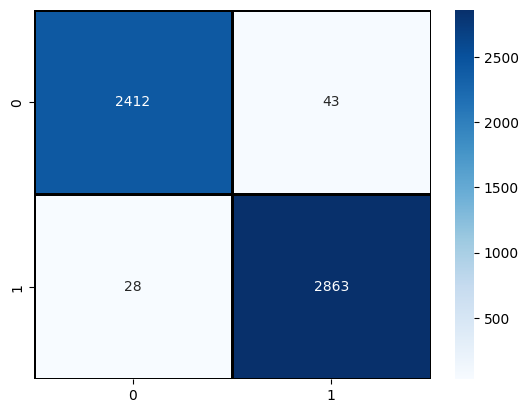

In [7]:

params_dt = {
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeClassifier(random_state=42)

best_dt_model, best_dt_params = ameliorate_with_grid_search(dt_model, X_train, y_train, params_dt)

print("Best params Decision Tree:", best_dt_params)

y_pred_dt = best_dt_model.predict(X_test)

print("Accuracy Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')


Best params Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy Gradient Boosting: 0.9891507669285448

Confusion Matrix:
 [[2420   35]
 [  23 2868]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2455
           1       0.99      0.99      0.99      2891

    accuracy                           0.99      5346
   macro avg       0.99      0.99      0.99      5346
weighted avg       0.99      0.99      0.99      5346

[[2420   35]
 [  23 2868]]


<Axes: >

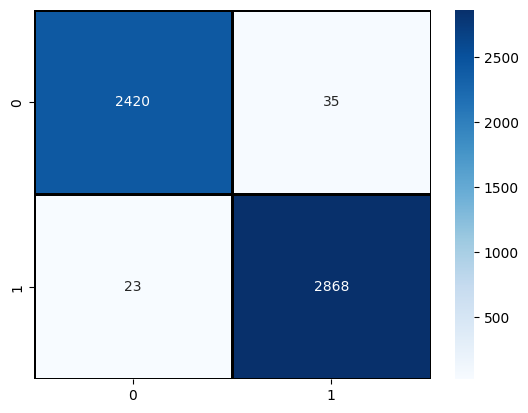

In [11]:
params_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5]
}

gb_model = GradientBoostingClassifier(random_state=42)

best_gb_model, best_gb_params = ameliorate_with_grid_search(gb_model, X_train, y_train, params_gb)

print("Best params Gradient Boosting:", best_gb_params)

y_pred_gb = best_gb_model.predict(X_test)

print("Accuracy Gradient Boosting:", accuracy_score(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test,y_pred_gb))
sns.heatmap(confusion_matrix(y_test,y_pred_gb),annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [09:26:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [09:26:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [09:26:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are

Best params (XGB): {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy (XGB): 0.9887766554433222

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2455
           1       0.99      0.99      0.99      2891

    accuracy                           0.99      5346
   macro avg       0.99      0.99      0.99      5346
weighted avg       0.99      0.99      0.99      5346



<Axes: >

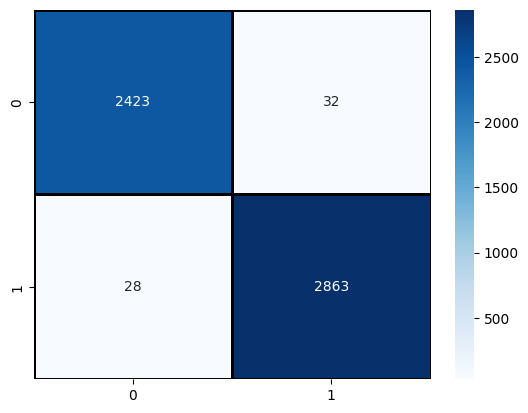

In [8]:
xgb_model = XGBClassifier(tree_method='hist',  # 'gpu_hist' si GPU dispo
                          eval_metric='mlogloss',
                          use_label_encoder=False)

# Hyperparamètres pour GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

xgb_model,best_param = ameliorate_with_grid_search(xgb_model,X_train,y_train,param_grid)
# Prédictions
y_pred = xgb_model.predict(X_test)

# Résultats
print("Best params (XGB):", best_params)
print("Accuracy (XGB):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')

[LightGBM] [Info] Number of positive: 9183, number of negative: 7924
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1828
[LightGBM] [Info] Number of data points in the train set: 17107, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.536798 -> initscore=0.147458
[LightGBM] [Info] Start training from score 0.147458
[LightGBM] [Info] Number of positive: 9183, number of negative: 7924
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001680 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1829
[LightGBM] [Info] Number of data points in the train set: 17107, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.536798 -> initscore=0.147458
[LightGBM

<Axes: >

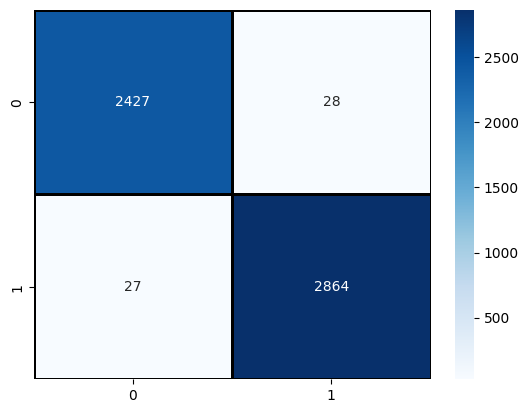

In [10]:

params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

lgbm_model = LGBMClassifier()

lgbm_model, best_params = ameliorate_with_grid_search(
    lgbm_model, X_train, y_train, params
)

y_pred = lgbm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Best Params:", best_params)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')


In [ ]:
joblib.dump(best_model,"Logestic_Regression_model.pkl")
joblib.dump(best_gb_model,"GradientGboost_model.pkl")
joblib.dump(svm_model,"SVM_model.pkl")
joblib.dump(xgb_model,"xgb_model.pkl")
joblib.dump(best_dt_model,"Decision_tree.pkl")
joblib.dump(lgbm_model,"LightGBM_model.pkl")


['SVM_model.pkl']

In [25]:
# rf_model = joblib.load("random_forest_model.pkl")
ggb_model = joblib.load("GradientGboost_model.pkl")
lr_model = joblib.load("Logestic_Regression_model.pkl")
svm_model = joblib.load("SVM_model.pkl")
xgb_model = joblib.load("xgb_model.pkl")
dt_model = joblib.load("Decision_tree.pkl")
lgbm_model = joblib.load("LightGBM_model.pkl")


Logistic Regression
Decision Tree
SVM
XGBoost
lightgbm


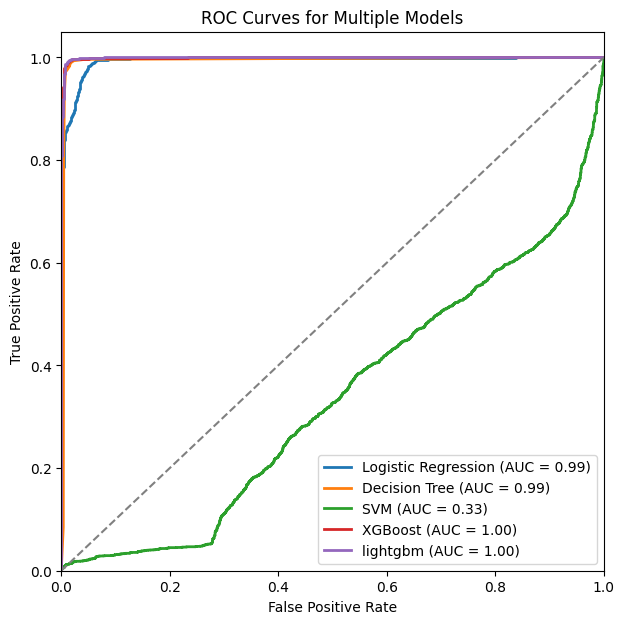

In [26]:
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(7, 7))
    
    for name, model in models.items():
        print(name)
        # If model has predict_proba
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test)[:, 1]
        # Else (e.g., some SVMs) use decision_function
        elif hasattr(model, "decision_function"):
            y_scores = model.decision_function(X_test)
        else:
            raise ValueError(f"Model {name} has no probability or decision scores.")

        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")
    
    # Random chance line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multiple Models')
    plt.legend(loc="lower right")
    plt.show()

# Example usage:
models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    # "Random Forest": rf_model,
    "SVM": svm_model,
    "XGBoost": xgb_model,
    "lightgbm":lgbm_model
}

plot_roc_curves(models, X_test, y_test)


In [45]:

def plot_precision_recall_curve(models,y_true):
    """
    Affiche la courbe précision-rappel à partir des vraies étiquettes et des scores du modèle.

    Paramètres :
        y_true : array-like, les vraies étiquettes (0 ou 1)
        y_scores : array-like, les scores de prédiction (proba pour classe 1)
        model_name : str, nom du modèle pour le titre
    """
    plt.figure(figsize=(6, 4))
    for name in models.keys():
        y_scores = models[name].predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_true, y_scores)

        plt.plot(recall, precision, lw=2,label=name)
    plt.xlabel("Rappel")
    plt.ylabel("Précision")
    plt.title(f"Courbe Précision-Rappel ")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

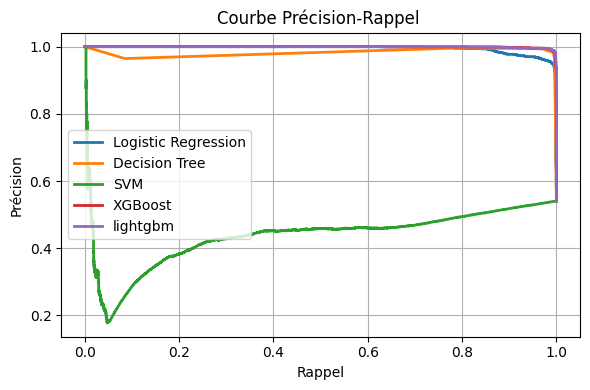

In [46]:
plot_precision_recall_curve(models,y_test)

In [50]:
def plot_scores_vs_threshold(models, y_true):
    """
    Affiche précision, rappel et F1-score en fonction du seuil pour plusieurs modèles sur le même graphique.

    Paramètres :
        models : dict {nom_modele: modele}
        y_true : array-like, vraies étiquettes (0 ou 1)
    """
    plt.figure(figsize=(10, 6))

    thresholds = np.linspace(0.0, 1.0, 100)

    for name in models.keys():
        # Récupération des scores
        if hasattr(models[name], "predict_proba"):
            y_scores = models[name].predict_proba(X_test)[:, 1]
        else:  # Exemple pour SVM sans probability=True
            y_scores = models[name].decision_function(X_test)

        precision_list = []
        recall_list = []
        f1_list = []

        for t in thresholds:
            y_pred = (y_scores >= t).astype(int)
            precision_list.append(precision_score(y_true, y_pred, zero_division=0))
            recall_list.append(recall_score(y_true, y_pred, zero_division=0))
            f1_list.append(f1_score(y_true, y_pred, zero_division=0))

        # Tracer les courbes
        plt.plot(thresholds, precision_list, label=f'Précision - {name}', linestyle='-')
        plt.plot(thresholds, recall_list, label=f'Rappel - {name}', linestyle='--')
        plt.plot(thresholds, f1_list, label=f'F1 - {name}', linestyle=':')

        plt.xlabel("Seuil")
        plt.ylabel("Score")
        plt.title("Évolution des scores selon le seuil de classification")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
        

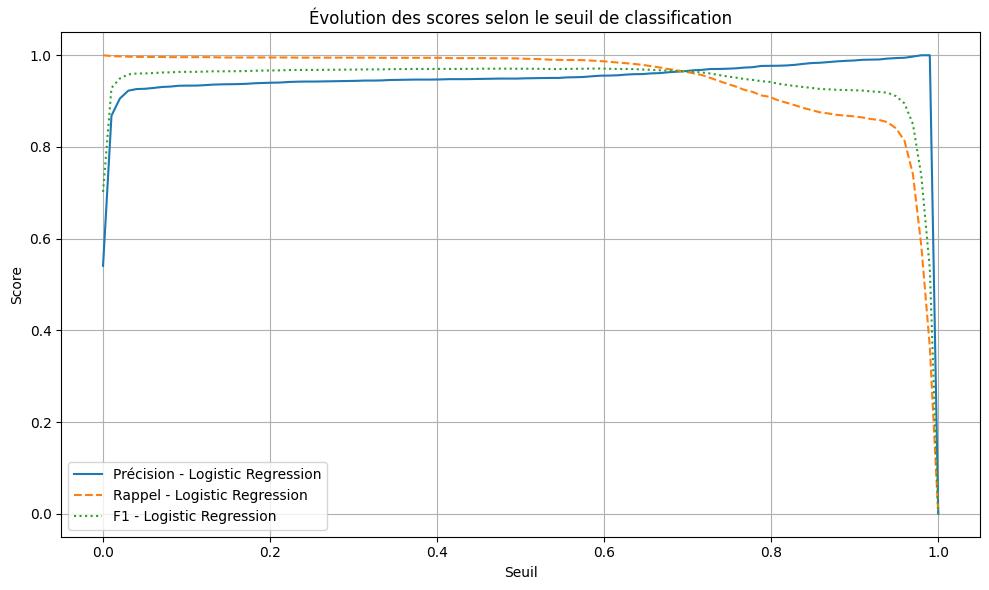

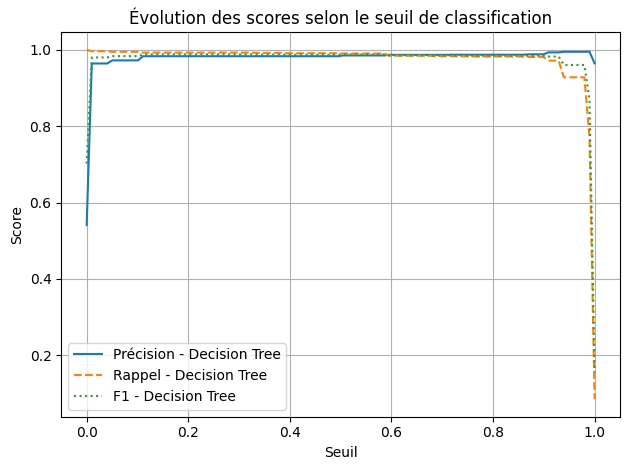

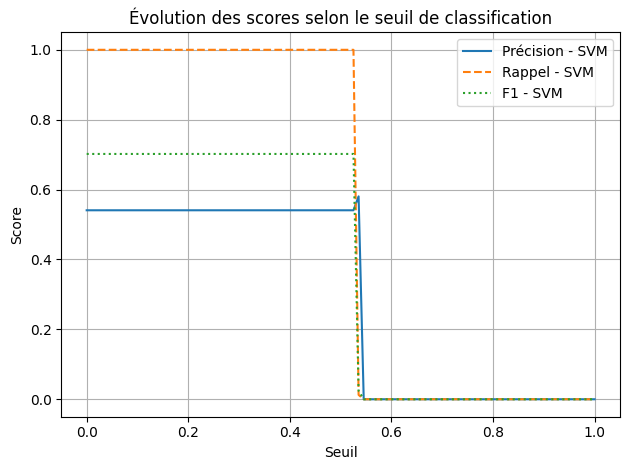

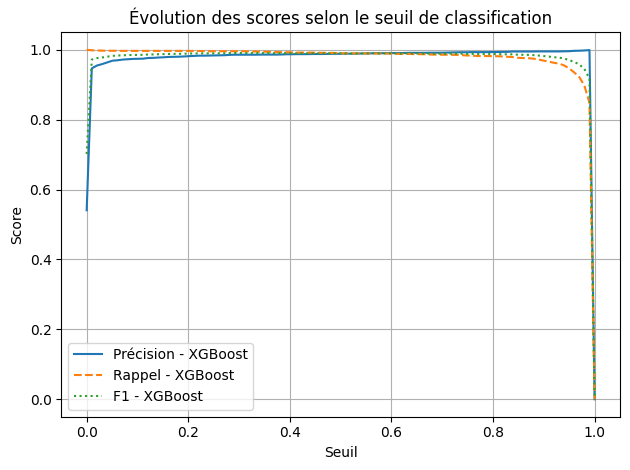

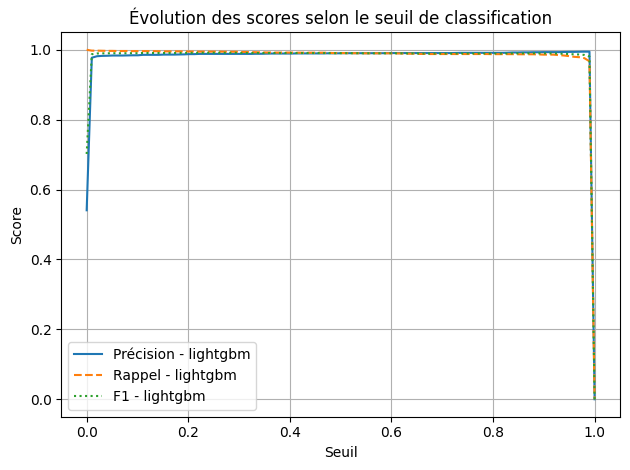

In [51]:
plot_scores_vs_threshold(models,y_test)